## Sentiment Analysis


* Use textblob to generate two features for each speech
  * polarity [-1,1]
    * smaller than 0  => negative
    * bigger than 0 => positive
      * bigger than 0 & smaller than 0.15 (median) => less postive
      * equal to 0.15 => positive
      * bigger than 0.15 =>very positive
  * subjectivity [0,1]
    * smaller than 0.5  => objective
    * bigger than 0.5 => subjective

* Density graphs of polarity under differnt topics using kernel density estimation
  * As seen in the KDE graph, the values of polarity are close to normal distributed, which similar value of mean between 0.1 and 0.2. 
* Visualization of the change of polarity along with the time. 
  * It can be seen that, all speeches are generally postive (polarity >0)

* Vistualizaiton of change of polarity under different topics.

  * Topic0 'Immigrants' has higher percentage of 'more positive' speeches.
  * Topic3 'Terrorist' has higher percentage of 'less positive' speeches



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
documents=pd.read_csv("https://raw.githubusercontent.com/s853348481/MDA/main/MDA_datasets/documents.csv")
df_dominant_topic=pd.read_csv("https://raw.githubusercontent.com/s853348481/MDA/main/MDA_datasets/df_dominant_topic.csv")
data = pd.read_csv("https://raw.githubusercontent.com/s853348481/MDA/main/MDA_datasets/speeches_df.csv")

In [14]:
warnings.filterwarnings('ignore')
#use Textblob to generate two features 'polarity' and 'subjectivity'
from textblob import TextBlob
list_do=range(len(documents))
documents["polarity"]=list_do
documents["subjectivity"]=list_do
i=0
for i in range(0,len(documents)):
  a=TextBlob(documents["content"][i]).sentiment.polarity
  format_float = "{:.2f}".format(a)
  documents["polarity"][i]=format_float
  a=TextBlob(documents["content"][i]).sentiment.subjectivity
  format_float = "{:.2f}".format(a)
  documents["subjectivity"][i]=format_float
documents["date"] =data[['date']]
documents.head()


,Unnamed: 0,content,index,polarity,subjectivity,date,sentiment,topic,year,header
0,0,"On behalf of the great state of Illinois, cro...",0,0.15,0.41,27 Jul 2004,positive,0.0,2004,2004 DNC Address
1,1,"Senator Obama: Thank you very much, Mr. Presi...",1,0.18,0.57,06 Jan 2005,very positive,0.0,2005,Senate Speech on Ohio Electoral Vote
2,2,"Good morning President Taylor, Board of Trust...",2,0.14,0.46,04 Jun 2005,less positive,4.0,2005,Knox College Commencement
3,3,"] Mr. President, today the nation mourns a gen...",3,0.09,0.45,25 Oct 2005,less positive,0.0,2005,Rosa Parks
4,4,"Thank you very much, Mr. President. You know,...",4,0.09,0.47,15 Dec 2005,less positive,5.0,2005,Senate Floor Speech on the Patriot Act


In [3]:
#Feature Engineering and visualzation
  #sentiment
warnings.filterwarnings('ignore')
documents["sentiment"]=list_do
documents.head()
for i in range(0,len(documents)):
  documents['polarity'].iloc[i]=float(documents['polarity'].iloc[i])
  if documents["polarity"].iloc[i] < 0.15:
    documents["sentiment"].iloc[i]='less positive'
  elif documents["polarity"].iloc[i] == 0.15:
    documents["sentiment"].iloc[i]='positive'
  else :
    documents["sentiment"].iloc[i]='very positive'
  #'dominant topics'
documents["topic"] =list_do
documents["topic"]=df_dominant_topic["Dominant_Topic"]
  #'year'
documents['date'] = pd.to_datetime(documents['date'])
documents['year'] = documents['date'].dt.year
documents2=documents
documents2.to_csv("documents2.csv")
documents2.head()

,Unnamed: 0,content,index,polarity,subjectivity,date,sentiment,topic,year
0,0,"On behalf of the great state of Illinois, cro...",0,0.15,0.41,2004-07-27,positive,0.0,2004
1,1,"Senator Obama: Thank you very much, Mr. Presi...",1,0.18,0.57,2005-01-06,very positive,0.0,2005
2,2,"Good morning President Taylor, Board of Trust...",2,0.14,0.46,2005-06-04,less positive,4.0,2005
3,3,"] Mr. President, today the nation mourns a gen...",3,0.09,0.45,2005-10-25,less positive,0.0,2005
4,4,"Thank you very much, Mr. President. You know,...",4,0.09,0.47,2005-12-15,less positive,5.0,2005


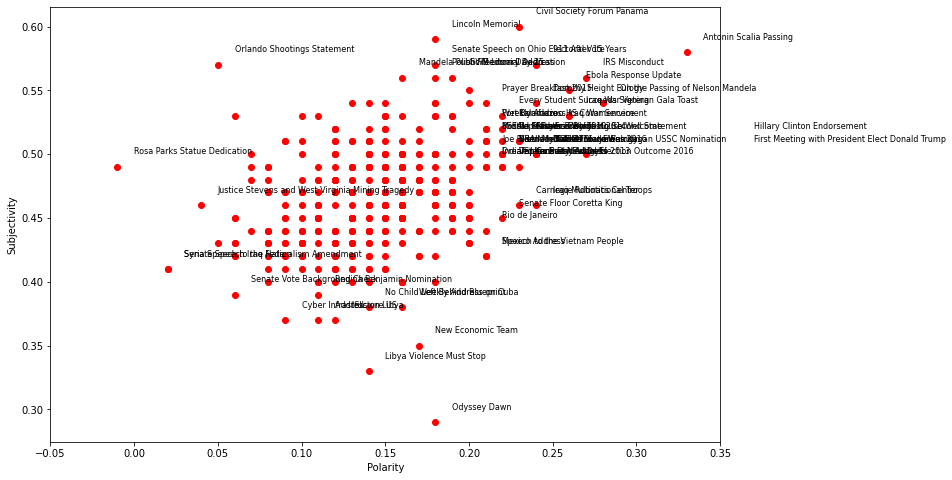

In [4]:
#see a general picture of the range of polarity and subjectivity for most speeches
documents2['header']=data[['header']]
plt.rcParams['figure.figsize'] = [12, 8]
for i in np.arange(0,430):
    x = float(documents2.polarity[i])
    y = float(documents2.subjectivity[i])
    plt.scatter(x,y,color='r')
    if (x>0.2)|(x<0.05)|(y>0.55)|(y<0.4):
        plt.text(x+0.01,y+0.01,documents2.header[i],fontsize=8)
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.xlim(-0.05,0.35)

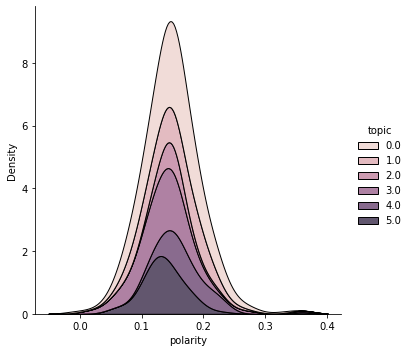

In [5]:
#kernel density estimation
sns.displot(documents2, x="polarity", hue="topic", kind="kde", multiple="stack")

* As seen in the Kde graph, the values of polarity are close to normal distributed, which similar value of mean between 0.1 and 0.2. 

In [6]:
import plotly.express as px
#ployly graph
fig = px.line(documents, x=documents['date'], y=documents['polarity'])
fig1 = px.line(documents, x=documents['date'], y=documents['subjectivity'])

In [7]:
#the change of polarity along with time
fig.show()

![PyTorch Logo](https://raw.githubusercontent.com/s853348481/Obama_Speech_NLP/main/MDA_datasets/polarity.png)

In [8]:
# the change of subjectivity along with time
fig1.show()

![PyTorch Logo](https://raw.githubusercontent.com/s853348481/Obama_Speech_NLP/main/MDA_datasets/subjectivity.png)

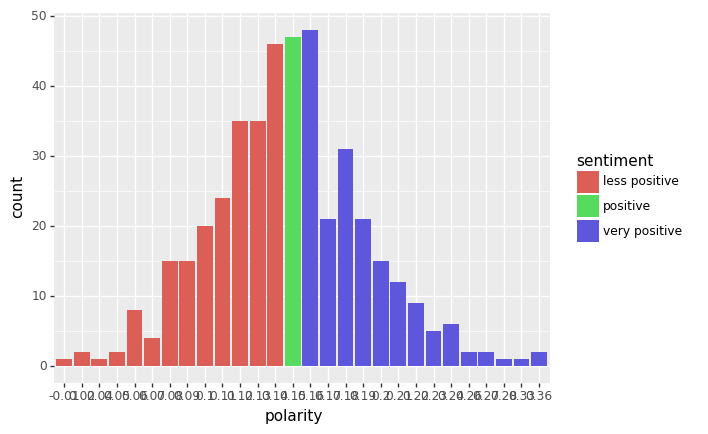

<ggplot: (8742711164277)>

In [9]:
from plotnine import ggplot, aes, geom_bar, geom_text, geom_density
#The median value of polarity 0.15 seprates dataset into two parts with similar size
warnings.filterwarnings('ignore')
ggplot(documents2)+aes(x ='polarity',fill = 'sentiment')+geom_bar(stat = "count")


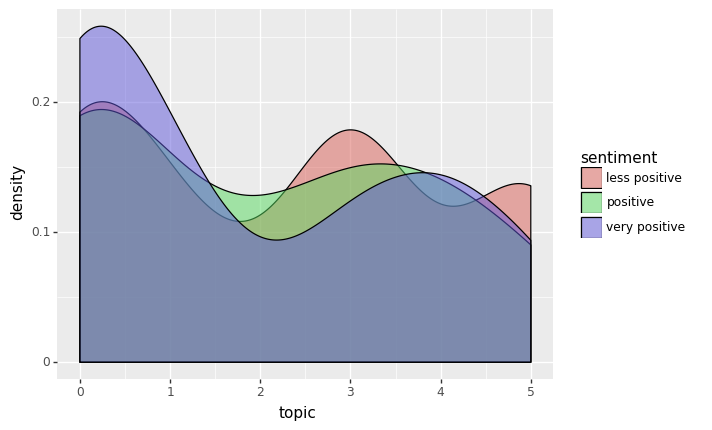

<ggplot: (8742852442989)>

In [10]:
#levels of positiveness of each topics 
warnings.filterwarnings('ignore')
ggplot(documents2)+aes(x = 'topic',fill = 'sentiment' )+geom_density(alpha =0.5)

  * Topic0 'Immigrants' has higher percentage of 'more positive' speeches.
  * Topic3 'Terrorist' has higher percentage of 'less positive' speeches